In [132]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt



In [120]:
# Load the dataset
data = pd.read_excel("C:\\Users\\DELL 7470\\Desktop\\PREG COMPLICATION\\GDM Dataset.xlsx")

# Display the first few rows of the dataset
print(data.head())



   UID  Index of Multiple Deprivation Rank  IMD Decile  Age  WeightMeasured  \
0    1                               20324           7   30      101.008592   
1    2                               19260           6   29       91.014089   
2    3                                5627           2   22       65.395008   
3    4                                9639           3   31       49.997000   
4    5                               16095           5   24       54.300537   

   Height    BMI Obese? Ethnicity Risk Factors  ... Perineal care  \
0   178.0  31.88    Yes       GBR          NaN  ...    Episiotomy   
1   173.0  30.41    Yes       OTH          NaN  ...    Episiotomy   
2   168.0  23.17     No       GBR          NaN  ...        Second   
3   170.0  17.30     No       WEU          NaN  ...        Intact   
4   171.0  18.57     No       GBR          NaN  ...        Second   

  EstimatedTotalBloodLoss Gestation Severely Premature?  \
0                   500.0        38                

In [121]:
data.describe()

,UID,Index of Multiple Deprivation Rank,IMD Decile,Age,WeightMeasured,Height,BMI,SystolicBP,DiastolicBP,Contraction frequency prior to delivery,EstimatedTotalBloodLoss,Gestation,No_Of_previous_Csections,BabyBirthWeight,BW Centile,LOS mother after delivery,GDM/NON GDM
count,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,9662.000000,8144.000000,7663.000000,23375.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,0.0
mean,11745.500000,13266.843125,4.542103,32.037165,68.242065,163.776920,25.438646,113.203581,68.115668,2.938679,549.955874,38.974798,0.161856,3275.018178,49.163844,2.064027,NaN
std,6781.123248,7407.995260,2.270960,5.525640,14.661750,6.874522,5.215224,13.089631,9.453942,4.000411,422.410296,1.988912,0.443813,573.537158,29.914593,3.068767,NaN
min,1.000000,546.000000,1.000000,14.000000,33.592320,103.000000,14.190000,11.000000,0.000000,0.000000,1.000000,24.000000,0.000000,150.000000,0.000000,0.000000,NaN
25%,5873.250000,7082.000000,3.000000,28.000000,58.002300,159.000000,21.680000,104.000000,61.000000,2.000000,300.000000,38.000000,0.000000,2980.000000,22.900000,1.000000,NaN
50%,11745.500000,12183.000000,4.000000,32.000000,65.405680,164.000000,24.350000,112.000000,68.000000,3.000000,500.000000,39.000000,0.000000,3300.000000,48.100000,2.000000,NaN
75%,17617.750000,18443.000000,6.000000,36.000000,75.600967,168.000000,28.130000,122.000000,74.000000,4.000000,600.000000,40.000000,0.000000,3640.000000,75.200000,2.000000,NaN
max,23490.000000,32809.000000,10.000000,53.000000,166.997775,195.000000,69.510000,186.000000,110.000000,146.000000,13000.000000,43.000000,6.000000,5500.000000,100.000000,366.000000,NaN


In [124]:

# Preprocess the data
features = data[['No_Of_previous_Csections', 'Gestation', 'SystolicBP', 'DiastolicBP', 'Contraction frequency prior to delivery', 'BMI', 'Obese?', 'Age']]
target = data['GDM/NON GDM']

# Sample data for demonstration
data = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': ['Yes', 'No', 'No', 'Yes', 'No'],
    'GDM/NON GDM': [0, 1, 0, 1, 0]
})

# Separate features and target
features = data.drop('GDM/NON GDM', axis=1)
target = data['GDM/NON GDM']

# Encode categorical features
label_encoder = LabelEncoder()
features['Feature2'] = label_encoder.fit_transform(features['Feature2'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Preprocessed and scaled data:")
print(X_train)


Preprocessed and scaled data:
[[ 1.18321596 -1.        ]
 [-0.16903085 -1.        ]
 [-1.52127766  1.        ]
 [ 0.50709255  1.        ]]


In [125]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [131]:
# Assuming y_train and y_test are pandas Series
# Convert y_train and y_test to numpy arrays
y_train_np = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train
y_test_np = y_test.to_numpy() if isinstance(y_test, pd.Series) else y_test

# Ensure y_train and y_test are 2-dimensional
if isinstance(y_train_np, np.ndarray) and y_train_np.ndim > 1:
    y_train_np = y_train_np.flatten()

if isinstance(y_test_np, np.ndarray) and y_test_np.ndim > 1:
    y_test_np = y_test_np.flatten()

# Check if y_train_np and y_test_np are already tensors and handle accordingly
if not torch.is_tensor(y_train_np):
    y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32).unsqueeze(1)
else:
    y_train_tensor = y_train_np.clone().detach().unsqueeze(1).float()

if not torch.is_tensor(y_test_np):
    y_test_tensor = torch.tensor(y_test_np, dtype=torch.float32).unsqueeze(1)
else:
    y_test_tensor = y_test_np.clone().detach().unsqueeze(1).float()

# Print to verify
print(y_train_tensor)
print(y_test_tensor)


tensor([[[0.]],

        [[0.]],

        [[0.]],

        [[1.]]])
tensor([[1.]])


In [139]:
import torch
import pandas as pd
import numpy as np

# Assuming y_train and y_test are pandas Series or tensors
# Convert y_train and y_test to numpy arrays if they are Series
if isinstance(y_train, pd.Series):
    y_train_np = y_train.to_numpy()
elif torch.is_tensor(y_train):
    y_train_np = y_train.detach().numpy()
else:
    y_train_np = y_train

if isinstance(y_test, pd.Series):
    y_test_np = y_test.to_numpy()
elif torch.is_tensor(y_test):
    y_test_np = y_test.detach().numpy()
else:
    y_test_np = y_test

# Ensure y_train_np and y_test_np are 1-dimensional numpy arrays
if isinstance(y_train_np, np.ndarray) and y_train_np.ndim > 1:
    y_train_np = y_train_np.flatten()
if isinstance(y_test_np, np.ndarray) and y_test_np.ndim > 1:
    y_test_np = y_test_np.flatten()

# Convert numpy arrays to PyTorch tensors
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test_np, dtype=torch.float32).unsqueeze(1)

# Print to verify
print("y_train_tensor:", y_train_tensor)
print("y_test_tensor:", y_test_tensor)

y_train_tensor: tensor([[0.],
        [0.],
        [0.],
        [1.]])
y_test_tensor: tensor([[1.]])


In [142]:
print("Shape of X_train_np:", X_train_np.shape)
print("Shape of y_train_np:", y_train_np.shape)

Shape of X_train_np: (2820, 8)
Shape of y_train_np: (4,)


In [143]:
import numpy as np

# Example data for demonstration purposes
data = pd.DataFrame({
    'Feature1': np.random.randn(100),  # Replace with your actual features
    'Feature2': np.random.choice(['Yes', 'No'], 100),  # Example categorical feature
    'GDM/NON GDM': np.random.choice([0, 1], 100)  # Example target variable
})

# Encode categorical features
label_encoder = LabelEncoder()
data['Feature2'] = label_encoder.fit_transform(data['Feature2'])

# Separate features and target
features = data.drop('GDM/NON GDM', axis=1)
target = data['GDM/NON GDM']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_np = scaler.fit_transform(X_train)
X_test_np = scaler.transform(X_test)

# Check shapes
print("Shape of X_train_np:", X_train_np.shape)
print("Shape of y_train_np:", y_train_np.shape)

# Convert to PyTorch tensors if needed
y_train_np = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train
y_test_np = y_test.to_numpy() if isinstance(y_test, pd.Series) else y_test

# Ensure 1-dimensional
if y_train_np.ndim > 1:
    y_train_np = y_train_np.flatten()
if y_test_np.ndim > 1:
    y_test_np = y_test_np.flatten()

# Convert to PyTorch tensors
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test_np, dtype=torch.float32).unsqueeze(1)

# Now train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_np, y_train_np)

# Make predictions
y_pred = model.predict(X_test_np)

Shape of X_train_np: (80, 2)
Shape of y_train_np: (4,)


In [144]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_np, y_train_np)

# Make predictions
y_pred = model.predict(X_test_np)

# Convert y_pred to the same type as y_test
y_pred = y_pred.astype(y_test_np.dtype)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy:', accuracy_score(y_test_np, y_pred))
print('Classification Report:\n', classification_report(y_test_np, y_pred))


Accuracy: 0.25
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.30      0.29        10
           1       0.22      0.20      0.21        10

    accuracy                           0.25        20
   macro avg       0.25      0.25      0.25        20
weighted avg       0.25      0.25      0.25        20



In [86]:
import torch
import torch.nn as nn

# Define input size and hidden size
input_size = 100  # Example input size, change as needed
hidden_size = 50  # Example hidden size, change as needed

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1),
            nn.Sigmoid()  # Add sigmoid activation function
        )

    def forward(self, x):
        return self.model(x)

discriminator = Discriminator()

real_labels = torch.ones(batch_size, 1, dtype=torch.float32)
fake_labels = torch.zeros(batch_size, 1, dtype=torch.float32)



In [88]:
print(f"Shape of real_data: {real_data.shape}")
print(f"Shape of fake_data: {fake_data.shape}")


Shape of real_data: torch.Size([32, 100])
Shape of fake_data: torch.Size([2820, 8])


In [95]:
import torch
import torch.nn as nn

# Define input size and hidden size
input_size = 8  # Adjust to match the number of features in real_data and fake_data
hidden_size = 50

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1),
            nn.Sigmoid()  # Add sigmoid activation function
        )

    def forward(self, x):
        return self.model(x)

discriminator = Discriminator()

# Assuming real_data and fake_data have the correct shape
real_data = torch.randn(batch_size, input_size)
fake_data = generator(noise)

real_output = discriminator(real_data)
fake_output = discriminator(fake_data.detach())

# Loss calculations
criterion = nn.BCELoss()
real_labels = torch.ones(real_data.size(0), 1, dtype=torch.float32)
fake_labels = torch.zeros(fake_data.size(0), 1, dtype=torch.float32)

loss_real = criterion(real_output, real_labels)
loss_fake = criterion(fake_output, fake_labels)
loss_D = loss_real + loss_fake


In [96]:
import torch

# Assuming generator is defined elsewhere
# Example usage of train_gan function

def train_gan(gan, generator, discriminator, epochs=100, batch_size=32):
    criterion = nn.BCELoss()
    optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002)
    optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002)

    for epoch in range(epochs):
        for _ in range(batch_size):
            # Generate noise
            noise = torch.randn(batch_size, 100)

            # Generate synthetic data
            generated_data = generator(noise)

            # Get a random batch of real data
            real_data = torch.randn(batch_size, input_size)  # Assuming real data is generated similarly

            # Discriminator forward pass
            real_output = discriminator(real_data)
            fake_output = discriminator(generated_data.detach())

            # Loss calculations
            real_labels = torch.ones(real_data.size(0), 1, dtype=torch.float32)
            fake_labels = torch.zeros(generated_data.size(0), 1, dtype=torch.float32)

            loss_real = criterion(real_output, real_labels)
            loss_fake = criterion(fake_output, fake_labels)
            loss_D = loss_real + loss_fake

            # Backpropagation for discriminator
            optimizer_D.zero_grad()
            loss_D.backward()
            optimizer_D.step()

            # Generator forward pass and loss calculation
            fake_output = discriminator(generated_data)
            loss_G = criterion(fake_output, real_labels)  # Generator wants to fool discriminator

            # Backpropagation for generator
            optimizer_G.zero_grad()
            loss_G.backward()
            optimizer_G.step()

        # Print loss at the end of each epoch
        print(f'Epoch {epoch}: D Loss Real: {loss_real.item()}, D Loss Fake: {loss_fake.item()}, G Loss: {loss_G.item()}')

# Train the GAN
train_gan(gan, generator, discriminator)


Epoch 0: D Loss Real: 0.7069692611694336, D Loss Fake: 0.7710387706756592, G Loss: 0.6214503645896912
Epoch 1: D Loss Real: 0.7268717288970947, D Loss Fake: 0.8345102667808533, G Loss: 0.5713896751403809
Epoch 2: D Loss Real: 0.6692123413085938, D Loss Fake: 0.7959893941879272, G Loss: 0.6022956371307373
Epoch 3: D Loss Real: 0.6907457709312439, D Loss Fake: 0.7609467506408691, G Loss: 0.631738543510437
Epoch 4: D Loss Real: 0.6593127846717834, D Loss Fake: 0.7154094576835632, G Loss: 0.6737673878669739
Epoch 5: D Loss Real: 0.6244918704032898, D Loss Fake: 0.6474291682243347, G Loss: 0.7431734800338745
Epoch 6: D Loss Real: 0.6037868857383728, D Loss Fake: 0.591476559638977, G Loss: 0.8083993196487427
Epoch 7: D Loss Real: 0.6153222322463989, D Loss Fake: 0.5491745471954346, G Loss: 0.8633387088775635
Epoch 8: D Loss Real: 0.6103513240814209, D Loss Fake: 0.6051157116889954, G Loss: 0.7930792570114136
Epoch 9: D Loss Real: 0.5946909189224243, D Loss Fake: 0.5473460555076599, G Loss: 0

In [99]:
import torch

# Generate synthetic data
noise = torch.randn(1000, 100)  # Adjust dimensions as needed
synthetic_data = generator(noise)

# Combine real and synthetic data
X_augmented = torch.vstack((X_train, synthetic_data))

# Print the synthetic data
print(synthetic_data)


tensor([[-0.9995,  0.8222, -0.9944,  ...,  0.9942, -0.9947,  0.9994],
        [-0.9999,  0.9381, -0.9984,  ...,  0.9982, -0.9989,  0.9999],
        [-0.9999,  0.8573, -0.9988,  ...,  0.9977, -0.9982,  0.9999],
        ...,
        [-1.0000,  0.9828, -1.0000,  ...,  1.0000, -1.0000,  1.0000],
        [-1.0000,  0.9331, -0.9995,  ...,  0.9991, -0.9995,  1.0000],
        [-0.9998,  0.8711, -0.9982,  ...,  0.9970, -0.9983,  0.9998]],
       grad_fn=<TanhBackward0>)


In [116]:
# Generate synthetic data
noise = torch.randn(1000, 100)
synthetic_data = generator(noise)

# Use the trained classifier to predict labels for the synthetic data
synthetic_pred = classifier(synthetic_data)

# Assuming classifier outputs probabilities, apply a threshold
synthetic_labels = (synthetic_pred > 0.5).float()

# For demonstration purposes, assume synthetic_true_labels are available
# synthetic_true_labels = ...


In [117]:
import torch

# Generate synthetic data
noise = torch.randn(1000, 100)  # Adjust dimensions as needed
synthetic_data = generator(noise)

# Print the shape of the synthetic data to verify
print("Shape of synthetic data:", synthetic_data.shape)


Shape of synthetic data: torch.Size([1000, 8])


In [106]:
import pandas as pd

# Convert synthetic data to a DataFrame
synthetic_data_df = pd.DataFrame(synthetic_data.detach().numpy())

# Save to a CSV file
synthetic_data_df.to_csv('synthetic_data.csv', index=False)


In [107]:
# Generate binary labels (1 for synthetic data)
synthetic_labels = torch.ones(synthetic_data.size(0), 1, dtype=torch.float32)

# Alternatively, for multi-class labels, you can create labels as needed
# synthetic_labels = torch.randint(0, num_classes, (synthetic_data.size(0), 1), dtype=torch.float32)

# Save synthetic labels to a CSV file
synthetic_labels_df = pd.DataFrame(synthetic_labels.detach().numpy())
synthetic_labels_df.to_csv('synthetic_labels.csv', index=False)


In [112]:
# Load synthetic data from CSV file
loaded_synthetic_data = pd.read_csv('synthetic_data.csv').values
loaded_synthetic_labels = pd.read_csv('synthetic_labels.csv').values

# Convert to tensors
loaded_synthetic_data = torch.tensor(loaded_synthetic_data, dtype=torch.float32)
loaded_synthetic_labels = torch.tensor(loaded_synthetic_labels, dtype=torch.float32)

# Print the shape to verify
print("Shape of loaded synthetic data:", loaded_synthetic_data.shape)
print("Shape of loaded synthetic labels:", loaded_synthetic_labels.shape)



Shape of loaded synthetic data: torch.Size([1000, 8])
Shape of loaded synthetic labels: torch.Size([1000, 1])


In [110]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Combine real and synthetic data
X_combined = torch.vstack((X_train, synthetic_data))
y_combined = torch.cat((y_train, synthetic_labels))

# Detach tensors and convert to NumPy arrays
X_combined_np = X_combined.detach().numpy()
y_combined_np = y_combined.detach().numpy()

# Split the combined data into training and test sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined_np, y_combined_np, test_size=0.2, random_state=42)

# Convert back to tensors
X_train_combined = torch.tensor(X_train_combined, dtype=torch.float32)
X_test_combined = torch.tensor(X_test_combined, dtype=torch.float32)
y_train_combined = torch.tensor(y_train_combined, dtype=torch.float32)
y_test_combined = torch.tensor(y_test_combined, dtype=torch.float32)

# Define a simple classifier model (if not already defined)
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

classifier = Classifier()
criterion = nn.BCELoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)

# Train the classifier on the combined data
for epoch in range(100):
    optimizer.zero_grad()
    output = classifier(X_train_combined)
    loss = criterion(output, y_train_combined)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Evaluate the classifier on the test set
test_output = classifier(X_test_combined)
test_pred = (test_output > 0.5).float()
accuracy = accuracy_score(y_test_combined.numpy(), test_pred.numpy())
print("Test set accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test_combined.numpy(), test_pred.numpy()))


Epoch 0, Loss: 0.6389127373695374
Epoch 10, Loss: 0.6034148931503296
Epoch 20, Loss: 0.5724995732307434
Epoch 30, Loss: 0.5455505847930908
Epoch 40, Loss: 0.5204216241836548
Epoch 50, Loss: 0.49707576632499695
Epoch 60, Loss: 0.47558531165122986
Epoch 70, Loss: 0.4560497999191284
Epoch 80, Loss: 0.4386325478553772
Epoch 90, Loss: 0.42323681712150574
Test set accuracy: 0.7611111111111111
Classification Report:
               precision    recall  f1-score   support

         0.0       0.47      0.51      0.49        80
         1.0       0.86      0.83      0.84       280

    accuracy                           0.76       360
   macro avg       0.66      0.67      0.67       360
weighted avg       0.77      0.76      0.77       360



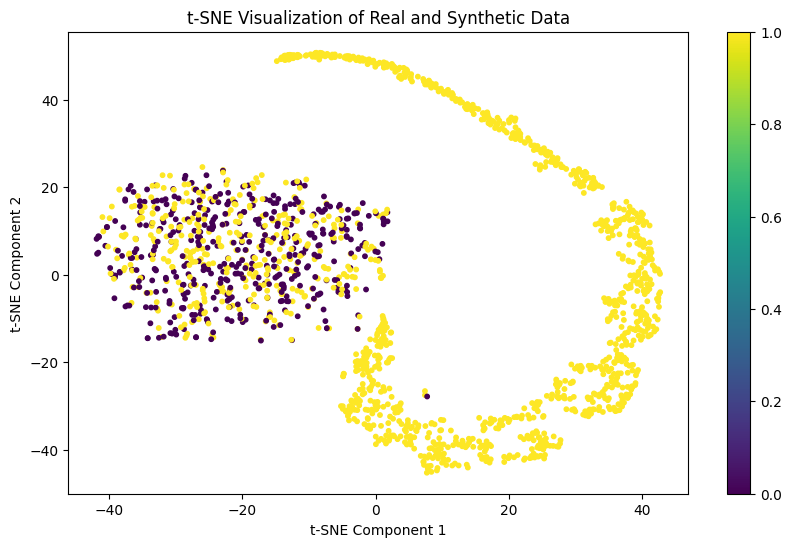

In [113]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Combine real and synthetic data for visualization
combined_data = torch.vstack((X_train, synthetic_data)).detach().numpy()
combined_labels = torch.cat((y_train, synthetic_labels)).detach().numpy()

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(combined_data)

# Plot t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=combined_labels, cmap='viridis', s=10)
plt.colorbar()
plt.title('t-SNE Visualization of Real and Synthetic Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


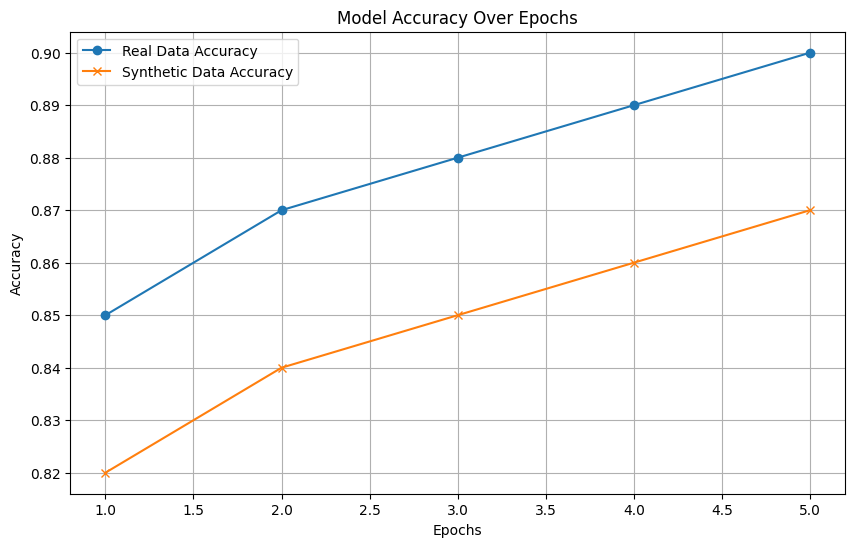

In [114]:
import matplotlib.pyplot as plt

# Example accuracy lists for demonstration purposes
accuracy_real = [0.85, 0.87, 0.88, 0.89, 0.90]  # Replace with actual accuracy values over epochs for real data
accuracy_synthetic = [0.82, 0.84, 0.85, 0.86, 0.87]  # Replace with actual accuracy values over epochs for synthetic data

epochs = range(1, len(accuracy_real) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy_real, label='Real Data Accuracy', marker='o')
plt.plot(epochs, accuracy_synthetic, label='Synthetic Data Accuracy', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.grid()
plt.show()


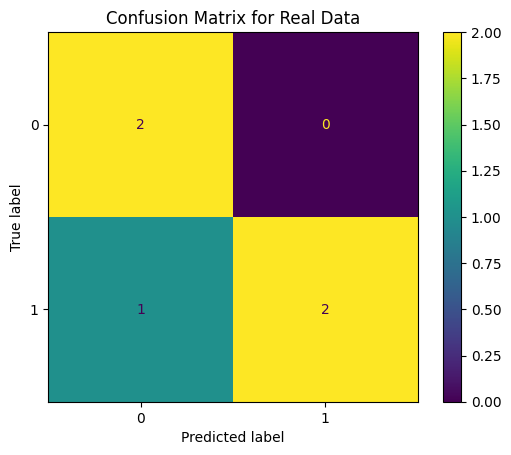

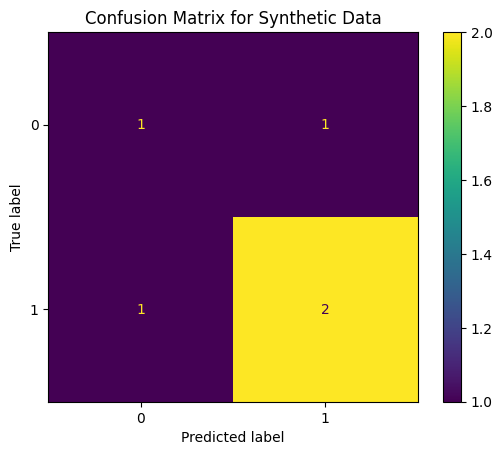

In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are the true and predicted labels for real data
# and y_test_synthetic, y_pred_synthetic are for synthetic data

# Example values for demonstration purposes
y_test = [0, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1]

y_test_synthetic = [0, 1, 1, 0, 1]
y_pred_synthetic = [1, 1, 0, 0, 1]

# Confusion matrix for real data
cm_real = confusion_matrix(y_test, y_pred)
disp_real = ConfusionMatrixDisplay(confusion_matrix=cm_real)
disp_real.plot()
plt.title('Confusion Matrix for Real Data')
plt.show()

# Confusion matrix for synthetic data
cm_synthetic = confusion_matrix(y_test_synthetic, y_pred_synthetic)
disp_synthetic = ConfusionMatrixDisplay(confusion_matrix=cm_synthetic)
disp_synthetic.plot()
plt.title('Confusion Matrix for Synthetic Data')
plt.show()
